In [1]:
import numpy as np
data = np.load('ct_data.npz')
X_train = data['X_train']; X_val = data['X_val']; X_test = data['X_test']
y_train = data['y_train']; y_val = data['y_val']; y_test = data['y_test']


In [2]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_val))
print(len(y_test))

(40754, 384)
(5785, 384)
(6961, 384)
40754
5785
6961


In [3]:
np.mean(y_test)

0.11690313366502872

In [4]:
np.mean(y_train)

-9.13868774539957e-15

In [5]:
np.mean(y_val)

-0.2160085093241599

# 1.
### a). 
Report mean with a "standard error" in the `y_val` (should have 5,785 lines) and the first 5,785 entries in the `y_train`

### b).
Identify the features that take on the same value for every training example, and remove them in the three sets.

Identify indentical columns in the training set and delete the later columns in the three sets.

Report which columns of the `X_...` arrays we remove as 0-based indexs.

In [6]:
repeat = []
duplicate = []

for i in range(X_train.shape[1]): 
    chara = np.array(X_train[:,i])
    trans = chara.tolist()
    repeat.append(len(list(set(trans))))
repeat = np.array(repeat)
print(np.where(repeat == 1)[0])

X_train = np.delete(X_train,np.where(repeat == 1)[0],axis=1)
X_val = np.delete(X_val,np.where(repeat == 1)[0],axis=1)
X_test = np.delete(X_test,np.where(repeat == 1)[0],axis=1)

dt = np.dtype((np.void, X_train.dtype.itemsize * X_train.shape[0]))
dataf = np.asfortranarray(X_train).view(dt)
u,uind = np.unique(dataf, return_inverse=True)
u = u.view(X_train.dtype).reshape(-1,X_train.shape[0]).T
index = [np.where(uind==x)[0] for x in range(u.shape[0])]

for i in index: 
    if len(i)>1:
        duplicate.append(i[1:])
duplicate = np.array(duplicate)   
print(duplicate)

for k in range(len(duplicate)):
    X_train = np.delete(X_train, duplicate[k], axis=1)
    X_val = np.delete(X_val, duplicate[k], axis=1)
    X_test = np.delete(X_test, duplicate[k], axis=1)

[ 59  69 179 189 351]


C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Changing the shape of an F-contiguous array by descriptor assignment is deprecated. To maintain the Fortran contiguity of a multidimensional Fortran array, use 'a.T.view(...).T' instead
  app.launch_new_instance()


[[ 76]
 [283]
 [354]
 [ 77]
 [195]
 [185]]


In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_val))
print(len(y_test))

(40754, 373)
(5785, 373)
(6961, 373)
40754
5785
6961


# 2. Linear regression baseline [15 marks]

In [8]:
from ct_support_code import *
def fit_linreg(X, yy, alpha):
    n = X.shape[0]
    # add a column of ones to X
    X = np.hstack([X, np.ones(n).reshape(n,1)])

    k = X.shape[1]
    # add the regulation to X
    X_tilde = np.vstack((X,np.sqrt(alpha)*np.eye(k)))

    yy = np.append(yy,[0]*k) # for the regulation
    return np.linalg.lstsq(X_tilde,yy)


In [9]:
fitmodel = fit_linreg(X_train, y_train, 30)
gradopt = fit_linreg_gradopt(X_train, y_train, 30)

C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


Report the root-mean-square errors (RMSE) on the training and validation sets for the parameters fitted using both your fit_linreg and the provided fit_linreg_gradopt. Do you get exactly the same results? Why or why not?

In [10]:
def rmse_linreg(fitmodel, X, yy):
    w = fitmodel[0] # coeficients
    n = X.shape[0]
    X = np.hstack([X, np.ones(n).reshape(n,1)])
    y_fit = np.dot(X, w)
    return np.sqrt(sum((y_fit-yy)**2)/n)
def rmse_gradopt(fitmodel, X, yy):
    w = fitmodel[0] # coeficients
    b = fitmodel[1]
    n = X.shape[0]
    y_fit = np.dot(X, w)+b
    return np.sqrt(sum((y_fit-yy)**2)/n)



In [11]:
print('For fit_linreg:')
print(f'The RMSE for training set is {rmse_linreg(fitmodel, X_train, y_train)}')
print(f'The RMSE for validation set is {rmse_linreg(fitmodel, X_val, y_val)}')
print('For fit_linreg_gradopt:')
print(f'The RMSE for training set is {rmse_gradopt(gradopt, X_train, y_train)}')
print(f'The RMSE for validation set is {rmse_gradopt(gradopt, X_val, y_val)}')

For fit_linreg:
The RMSE for training set is 0.35787512881598177
The RMSE for validation set is 0.42360525587678854
For fit_linreg_gradopt:
The RMSE for training set is 0.3578603283245702
The RMSE for validation set is 0.42376229980833413


In [12]:
X_train[:, 0:231].shape

(40754, 231)

In [13]:
rmse_linreg(fit_linreg(X_train[:, 0:231], y_train, 30), X_train[:, 0:231], y_train)

C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


0.4092840089130781

# 3. Invented classification tasks

In [14]:
import numpy as np

K = 20 
mx = np.max(y_train); mn = np.min(y_train); hh = (mx-mn)/(K+1)
thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)
class_y_train = []
for kk in range(K):
    labels = y_train > thresholds[kk]
    class_y_train.append(labels+0)
class_y_train = np.array(class_y_train)
    
class_y_val = []
for kk in range(K):
    labels = y_val > thresholds[kk]
    class_y_val.append(labels+0)
class_y_val = np.array(class_y_val)

from ct_support_code import *
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import cho_factor, cho_solve

# fit the logistic regression model: 
def fit_logreg(X, yy, alpha): 
    D = X.shape[1]
    args = (X, yy, alpha)
    init = (np.zeros(D), np.array(0))
    ww, bb = minimize_list(logreg_cost, init, args)
    return ww, bb

# fit the 20 logistic regression model: 
w_hat_m = []
b_hat_v = []
for i in range(20): 
    w_hat, b_hat = fit_logreg(X=X_train, yy=class_y_train[i], alpha=30)
    w_hat_m.append(w_hat)
    b_hat_v.append(b_hat)
w_hat_m = np.array(w_hat_m).T
b_hat_v = np.array(b_hat_v)

# Train
yy = 2*(class_y_train==1) - 1
aa = yy.T * (np.dot(X_train, w_hat_m) + b_hat_v)
# transformation of X_train matrix
Tram_X_train = 1/(1 + np.exp(-aa))

# Validation
yy_val = 2*(class_y_val==1) - 1
aa_val = yy_val.T * (np.dot(X_val, w_hat_m) + b_hat_v)
# transformation of X_val matrix
Val_X_train = 1/(1 + np.exp(-aa_val))

# fit the linear model using transforming X matrix
w_train, b_train = fit_linreg_gradopt(X=Tram_X_train, yy=y_train, alpha=30)
w_val, b_val = fit_linreg_gradopt(X=Val_X_train, yy=y_val, alpha=30)

# Calculating the RMSE
def RMSE(para, X, yy):
    ww = para[0] # coeficients
    bb = para[1]
    y_fit = np.dot(X, ww)+bb
    return np.sqrt(sum((y_fit-yy)**2)/n)

RMSE_T = RMSE(para = fit_linreg_gradopt(X=Tram_X_train, yy=y_train, alpha=30), X = Tram_X_train, yy = y_train)
RMSE_V = RMSE(para = fit_linreg_gradopt(X=Val_X_train, yy=y_val, alpha=30), X = Val_X_train, yy = y_val)

print(RMSE_T)
print(RMSE_V)

136.20446517858414
52.69510551860815


# 4. Small neural network

In [15]:
from ct_support_code import *
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import cho_factor, cho_solve

# a) Using random initialization of the parameters
def fit_nn_random(X, yy, alpha): 
    args = (X, yy, alpha)
    V = 0.1*np.random.randn(K, X.shape[1])/np.sqrt(X.shape[1])
    bk = 0.1*np.random.randn(K)/np.sqrt(K)
    ww = 0.1*np.random.randn(K)/np.sqrt(K)  
    bb = 0.1*np.random.randn(1)
    init = (ww, bb, V, bk)
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

# b) Using parameters initialized using the fits made in Q3
def fit_nn_logi(X, yy, alpha): 
    args = (X, yy, alpha)
    V = w_hat_m.T
    bk = b_hat_v
    ww = w_train  
    bb = b_train
    init = (ww, bb, V, bk)
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

# Prediction: 
np.random.seed(0)
ww, bb, V, bk = fit_nn_random(X = X_train, yy = y_train, alpha = 30)
para = (ww, bb, V, bk)
RMSE_random = np.sqrt(sum((nn_cost(para, X=X_train, yy=None, alpha=None) - y_train)**2))
www, bbb, VV, bkk = fit_nn_logi(X = X_train, yy = y_train, alpha = 30)
para_logi = (www,bbb,VV,bkk)
RMSE_logi = np.sqrt(sum((nn_cost(para_logi, X=X_train, yy=None, alpha=None) - y_train)**2))

print(RMSE_random)
print(RMSE_logi)

28.631114822794057
28.603358884797796


# 5. Bayesian optimisation

In [16]:
import numpy as np
from ct_support_code import *
import scipy.stats

# trains the neural network for an alpha, returns the validation RMSE
def train_nn_reg(X, yy, X_val, y_val, alpha):
    ww, bb, V, bk = fit_nn_random(X, yy, alpha)
    para = (ww, bb, V, bk)
    y_fit = nn_cost(para, X=X_val)
    return np.sqrt(sum((y_fit-y_val)**2)/len(y_fit))

# function for generating y
base = train_nn_reg(X_train, y_train, X_val, y_val, 30)
def LRMSE(X, yy, X_val, y_val, alpha):
    return np.log(base/train_nn_reg(X, yy, X_val, y_val, alpha))

# select next alpha according to PoI
def next_alpha(mu_star, cov_star, y_alpha):
    PoI = scipy.stats.norm.pdf((mu_star - max(y_alpha))/np.sqrt(np.diag(cov_star)))
    max_PoI = max(PoI)
    max_alpha = X_star[np.where(PoI==max_PoI)[0][0]]
    return max_PoI, max_alpha

In [17]:
alphas = np.arange(0, 50, 0.02)
# Pick three alphas from this set for as training locations, 
ind = len(alphas)/4
X_alpha = alphas.take([ind-1,ind*2-1,ind*3-1])
# remaining locations as values for the acquisition function
X_star = np.setdiff1d(alphas, X_alpha)

# generate y for the picked alpha
y_alpha = np.zeros(len(X_alpha)) 
for i in range(len(X_alpha)):
    y_alpha[i] = LRMSE(X_train, y_train, X_val, y_val, X_alpha[i])


In [18]:
# retrain, do five iterations
iteration = 0
while iteration < 5:
    # calculate the posterior Gaussian Process
    mu_star, cov_star = gp_post_par(X_star, X_alpha, y_alpha)
    # select next alpha according to PoI
    max_PoI, alpha_new = next_alpha(mu_star, cov_star, y_alpha)
    iteration += 1
    print(f'The maximum probability of improvement is {max_PoI}, with alpha = {alpha_new}, for iteration {iteration}')
    X_alpha = np.append(X_alpha, alpha_new)
    X_star = np.setdiff1d(alphas, X_alpha)
    y_alpha = np.append(y_alpha, LRMSE(X_train, y_train, X_val, y_val, alpha_new))

The maximum probability of improvement is 0.3762439131308956, with alpha = 13.86, for iteration 1
The maximum probability of improvement is 0.3622776781757357, with alpha = 9.08, for iteration 2
The maximum probability of improvement is 0.34566890861340177, with alpha = 9.1, for iteration 3
The maximum probability of improvement is 0.35452121459600816, with alpha = 9.06, for iteration 4
The maximum probability of improvement is 0.3173822033001063, with alpha = 4.96, for iteration 5


In [19]:
# report the best alpha
best_alpha = X_alpha[np.where(y_alpha==max(y_alpha))[0][0]]

val_RMSE = train_nn_reg(X_train, y_train, X_val, y_val, best_alpha)
test_RMSE = train_nn_reg(X_train, y_train, X_test, y_test, best_alpha)

print(f'The best alpha is {best_alpha}, with its validation RMSE is {val_RMSE} and test RMSE is {test_RMSE}')

The best alpha is 12.48, with its validation RMSE is 0.2582302787839227 and test RMSE is 0.2892353771241661


In [ ]:
np.where(y_alpha==max(y_alpha))

(array([8], dtype=int64),)

In [ ]:
X_alpha

array([12.48, 24.98, 37.48, 13.86,  9.08,  9.1 ,  9.06,  4.96,  0.52])

In [31]:
base

20.798679726995577

The model is improved with smaller validation and test RMSEs. The observation noise can come from the random selection of initial parameters in the neural network. 

# 6. What next

In [7]:
import lightgbm as lgb
# 初始化模型
LGBR = lgb.LGBMRegressor() # 基模型
# 训练/fit拟合
LGBR.fit(X_train, y_train)
# 预测
y_pred = LGBR.predict(X_test)
# 评估
rmse = np.sqrt(sum((y_pred-y_test)**2))

In [8]:
rmse

28.153938563854627

In [33]:
X_val.shape

(5785, 373)

In [40]:
X_train[:, 0:231][0]

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
       -0.25    , -0.25    , -0.25    , -0.25    ,  0.      ,  0.      ,
        0.      ,  0.8     ,  0.      ,  0.      ,  0.      , -0.25    ,
       -0.25    , -0.25    ,  0.      ,  0.      ,  0.      ,  0.956533,
        0.8521  ,  0.      ,  0.      ,  0.      ,  0.      , -0.25    ,
        0.      ,  0.      ,  0.      ,  0.932476,  0.960794,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.791258,  0.979383,  0.8725  ,  0.      ,  0.      ,
        0.      , -0.25    ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.16    ,  0.979998,  0.954111,  0.      , -0.25    ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.689167,  0.987036,  0.92411 ,
        0.      , -0.25    ,  0.      ,  0.      ,  0.      ,  0.867052,
        0.975287,  0.813456,  0.      ,  0.      , -0.25    ,  0.      ,
        0.      ,  0.934405,  0.903144,  0.      , 

In [34]:
X_val[:, 232:373]

array([[ 0.989669,  0.      ,  0.      , ...,  0.      ,  0.      ,
        -0.25    ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
        -0.25    ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
        -0.25    ],
       ...,
       [ 0.      ,  0.918251,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.999534, ...,  0.      ,  0.      ,
        -0.25    ]])

In [7]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error


In [44]:
#create two hidden layer and output layer

input=layers.Input(shape=(373,))
x=layers.Dense(64,activation="relu")(input)
x=layers.Dense(32,activation="relu")(x)
output=layers.Dense(1,activation="linear")(x)

# fit the model
model=Model(input,output)
model.compile(optimizer="adam",loss="mae")
model.fit(X_train,y_train)

1274/1274 [==============================] - 2s 1ms/step - loss: 0.1182


In [46]:
# evaluation
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("The test RMSE is {}.".format(rmse))

pred2 = model.predict(X_val)
rmse2 = np.sqrt(mean_squared_error(y_val, pred2))
print("The validation RMSE is {}.".format(rmse2))

The test RMSE is 0.26799148792898464.
The validation RMSE is 0.2399578750867347.


# 一些参考的code

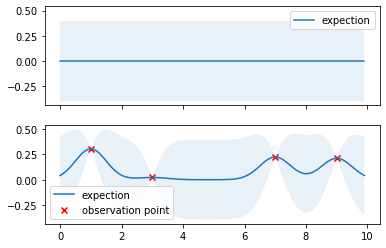

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ct_support_code import *

#高斯核函数
def gaussian_kernel(x1, x2, l=0.5, sigma_f=0.2):
    m, n = x1.shape[0], x2.shape[0]
    dist_matrix = np.zeros((m, n), dtype=float)
    for i in range(m):
        for j in range(n):
            dist_matrix[i][j] = np.sum((x1[i] - x2[j]) ** 2)
    return sigma_f ** 2 * np.exp(- 0.5 / l ** 2 * dist_matrix)


#生成观测值，取sin函数没有别的用意，单纯就是为了计算出Y
def getY(X):
    X = np.asarray(X)
    Y = np.sin(X)*0.4 + np.random.normal(0, 0.05, size=X.shape)
    return Y.tolist()

#根据观察点X，修正生成高斯过程新的均值和协方差
def update(X, X_star):
    X = np.asarray(X)
    X_star = np.asarray(X_star)
    K_YY = gaussian_kernel(X, X)  # K(X,X)
    K_ff = gaussian_kernel(X_star, X_star)  # K(X*, X*)
    K_Yf = gaussian_kernel(X, X_star)  # K(X, X*)
    K_fY = K_Yf.T # K(X*, X) 协方差矩阵是对称的，因此分块互为转置
    K_YY_inv = np.linalg.inv(K_YY + 1e-8 * np.eye(len(X)))  # (N, N)
    
    mu_star = K_fY.dot(K_YY_inv).dot(Y)
    cov_star = K_ff - K_fY.dot(K_YY_inv).dot(K_Yf)
    return mu_star, cov_star


f, ax = plt.subplots(2, 1, sharex=True,sharey=True)
#绘制高斯过程的先验
X_pre = np.arange(0, 10, 0.1)
mu_pre = np.array([0]*len(X_pre))
Y_pre = mu_pre
cov_pre = gaussian_kernel(X_pre, X_pre)
uncertainty = 1.96 * np.sqrt(np.diag(cov_pre))#取95%置信区间
ax[0].fill_between(X_pre, Y_pre + uncertainty,Y_pre - uncertainty, alpha=0.1)
ax[0].plot(X_pre, Y_pre, label="expection")
ax[0].legend()


#绘制基于观测值的高斯过程后验
X = np.array([1, 3, 7, 9]).reshape(-1, 1)#4*1矩阵
Y = getY(X)
X_star = np.arange(0, 10, 0.1).reshape(-1, 1)
mu_star, cov_star = update(X, X_star)
Y_star = mu_star.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov_star))#取95%置信区间
ax[1].fill_between(X_star.ravel(), Y_star + uncertainty, Y_star - uncertainty, alpha=0.1)
ax[1].plot(X_star, Y_star, label="expection")
ax[1].scatter(X, Y, label="observation point", c="red", marker="x")
ax[1].legend()
plt.show()